https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

* Do scikit 4 distrubtion plot
* Do each algorithm on it
* Plot output of each one
* Do general ones at end

## Dummy Data

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

In [125]:
# Example settings
n_samples = 300

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

In [126]:
len(datasets[0]), len(datasets[1])

(255, 255)

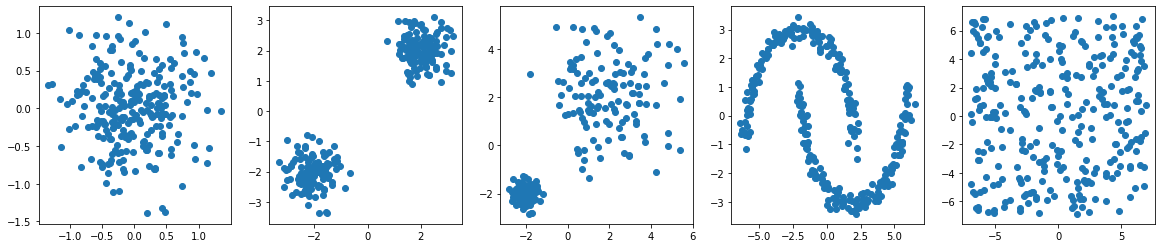

In [127]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    axs[i].scatter(datasets[i][:, 0], datasets[i][:, 1])
fig

In [128]:
len(datasets[0]), len(datasets[1])

(255, 255)

## Method 1 - Standard Deviation

In [129]:

# #seed(1)
# anomalies = []

# # multiply and add by random numbers to get some real values
# data = np.random.randn(50000)  * 20 + 20

# # Function to Detection Outlier on one-dimentional datasets.
# def find_anomalies(random_data):
#     # Set upper and lower limit to 3 standard deviation
#     random_data_std = np.std(random_data)
#     random_data_mean = np.mean(random_data)
#     anomaly_cut_off = random_data_std * 3
    
#     lower_limit  = random_data_mean - anomaly_cut_off 
#     upper_limit = random_data_mean + anomaly_cut_off
#     print(lower_limit)
#     # Generate outliers
#     for outlier in random_data:
#         if outlier > upper_limit or outlier < lower_limit:
#             anomalies.append(outlier)
#     return anomalies

# #find_anomalies(data)

## Method 2 - Box Plots

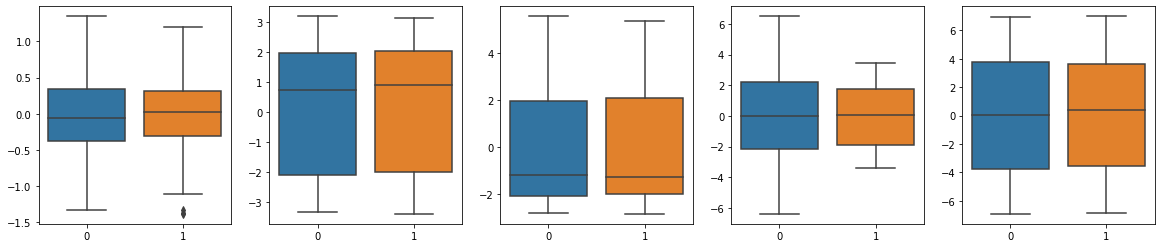

In [130]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    sns.boxplot(data=datasets[i], ax=axs[i])
fig

In [131]:
len(datasets[0]), len(datasets[1])

(255, 255)

Update above for 2D gaussian anomolies 

## Method 3 - DBScan Clustering

In [164]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 0.5)

c = []
for i in range(0, len(datasets)):
    clusters = outlier_detection.fit_predict(datasets[i])
    c.append(clusters)
    c[i] = np.where(c[i]!=-1, 0, c[i]) 
    print(list(clusters).count(-1))

0
1
19
1
87


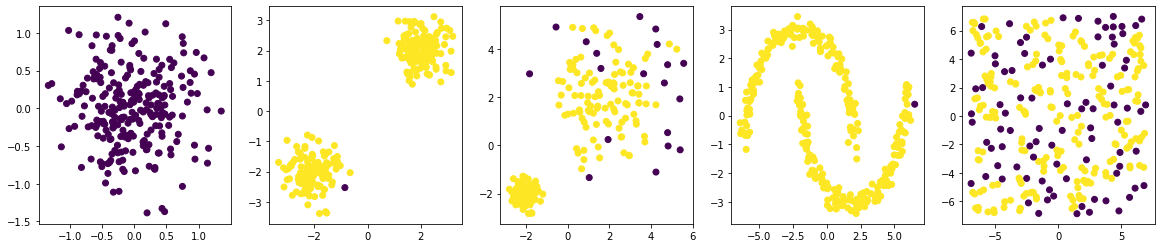

In [165]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    axs[i].scatter(datasets[i][:, 0], datasets[i][:, 1],c=c[i])
fig

## Method 4 - Isolation Forest

In [134]:
from sklearn.ensemble import IsolationForest
#np.random.seed(1)
#random_data = np.random.randn(50000,2)  * 20 + 20




In [135]:
c = []
for i in range(0, len(datasets)):
    clf = IsolationForest(behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
    preds = clf.fit_predict(datasets[i])
    c.append(preds)
    print(list(preds).count(-1))

70
97
87
174
196


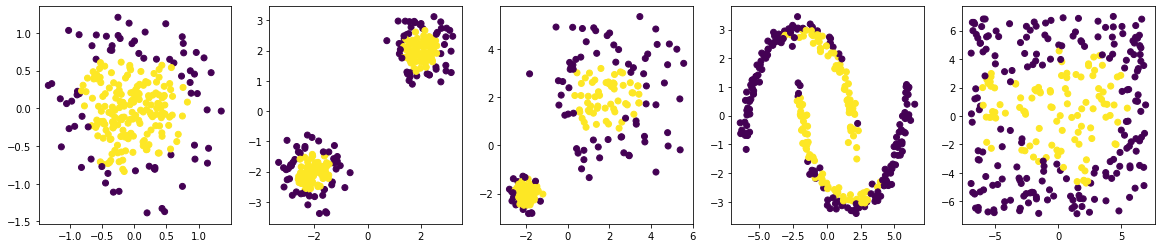

In [136]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    axs[i].scatter(datasets[i][:, 0], datasets[i][:, 1],c=c[i])
fig

Comparison of scikit learn techniques
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

## Method 5 - Robust Random Cut Forest

## Method 6 - Robust Covariance



from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [137]:
from sklearn.covariance import EllipticEnvelope


In [138]:
c = []
for i in range(0, len(datasets)):
    ee = EllipticEnvelope(contamination=0.15)
    preds = ee.fit_predict(datasets[i])
    c.append(preds)
    print(list(preds).count(-1))

39
39
39
45
45


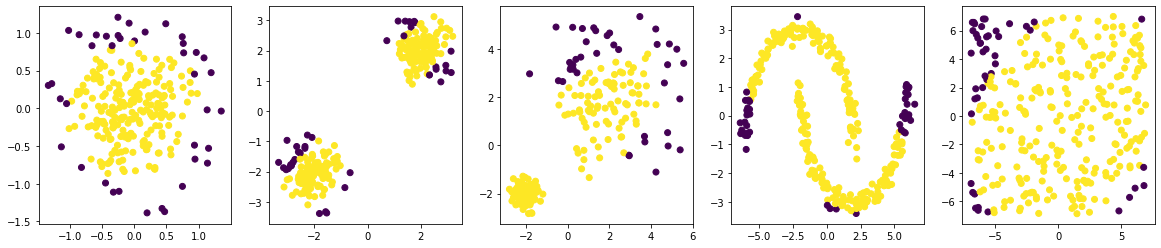

In [139]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    axs[i].scatter(datasets[i][:, 0], datasets[i][:, 1],c=c[i])
fig

## Method 7 - One Class SVM

In [140]:
from sklearn import svm

In [141]:
c = []
for i in range(0, len(datasets)):
    model = svm.OneClassSVM(nu=0.15, kernel="rbf",gamma=0.1)
    preds = model.fit_predict(datasets[i])
    c.append(preds)
    print(list(preds).count(-1))

38
38
37
44
49


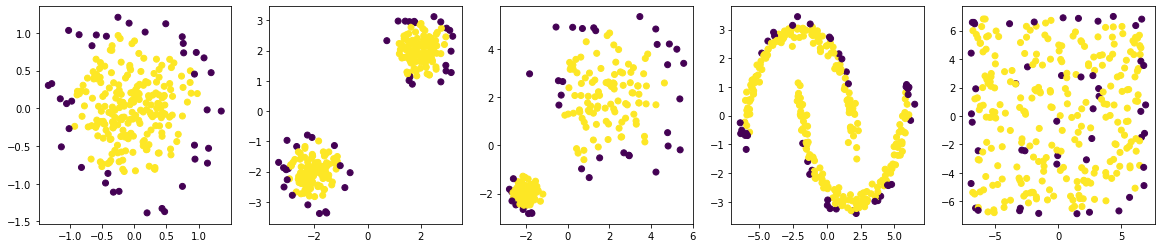

In [142]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    axs[i].scatter(datasets[i][:, 0], datasets[i][:, 1],c=c[i])
fig

## Method 8 - Local Outlier Factor

In [143]:
from sklearn.neighbors import LocalOutlierFactor

In [145]:
c = []
for i in range(0, len(datasets)):
    lof = LocalOutlierFactor(n_neighbors=35, contamination=0.15)    
    preds = lof.fit_predict(datasets[i])
    c.append(preds)
    print(list(preds).count(-1))

39
39
39
45
45


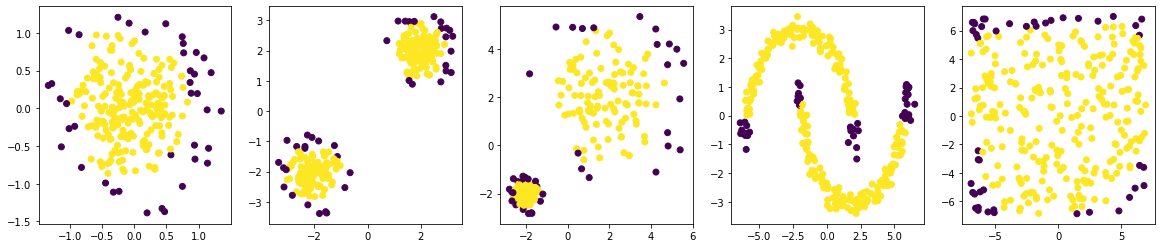

In [146]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
plt.close()
for i in range(0, len(datasets)):
    axs[i].scatter(datasets[i][:, 0], datasets[i][:, 1],c=c[i])
fig

## Method 9 - PCA

## Method 10 - AutoEncoder 

https://github.com/scottclay/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/blob/master/fraud_detection.ipynb

In [168]:
import keras

ModuleNotFoundError: No module named 'keras'

In [ ]:

clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)